## fundamentos


**Espaço de probabilidade:** Existem três componentes em um espaço de probabilidade: espaço de amostra (um conjunto de todos os resultados possíveis), eventos (um conjunto de resultados (um subconjunto do espaço amostral) ao qual é associado um valor de probabilidade) e medidas de probabilidade (uma probabilidade atribuida ao evento).

**Variável aleatória:** Uma variável aleatória em si é uma função e pode ser discreta (possui um conjunto finito de resultados possíveis que podem ser contados) ou contínua (conjunto infinito de resultados possíveis que não podem ser contados).

In [1]:
# como a medida de probabilidade é aditiva, a probabilidade de um dado mostrar 1 ou 4 é:

print(f'a probabilidade de um dado mostrar 1 ou 4 é:', {round((1/6)+(1/6), 2)})

a probabilidade de um dado mostrar 1 ou 4 é: {0.33}


In [2]:
# princípio da multiplicação: se jogarmos uma moeda duas vezes:

print(f'a probabilidade de ver cara nas duas vezes é:', {round((1/2)*(1/2), 1)})

# princípio da adição: se jogarmos uma moeda duas vezes:

print(f'a probabilidade de ver cara ou coroa é:', {round((1/2)+(1/2), 1)})

a probabilidade de ver cara nas duas vezes é: {0.2}
a probabilidade de ver cara ou coroa é: {1.0}


**Probabilidade condicional:** Considerando que exista um conjunto de amostras de carros, os quais alguns são vermelhos e outros azuis, podendo ser carros grandes ou pequenos: <br>
* a probabilidade de um carro ser vermelho ou azul é P(V) U P(A) = P(V) + P(A) <br>
* a probabilidade de um carro ser vermelho e grande é P(V e G) = P(V) x P(G | V)

## estatística descritiva

**Tipos de medida:** Medidas de tendência central (média, moda e mediana), variabilidade (variância e desvio padrão) e correlação (covariância e coeficiente de correlação).

**População e sample:** A população é o conjunto de todos os elementos e uma sample é um subconjunto contendo alguns elementos da população.

**Outliers:** Um outlier é um ponto do conjunto de dados que difere significativamente da maioria.

In [3]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [4]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]

print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [5]:
# criar array e series:

y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

In [6]:
# retorna nulo por ter um valor nulo no meio:
print(np.mean(y_with_nan))

# para evitar isso:
print(np.nanmean(y_with_nan))

nan
8.7


In [7]:
# média ponderada:

x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

y, w = np.array(x), np.array(w)
print(np.average(y, weights=w))

6.95


In [8]:
# média geométrica (enésima raiz do produtório dos n elementos):

print(statistics.geometric_mean(x))

4.67788567485604


In [9]:
# mediana (valor central):
print(statistics.median(x))

# as funções abaixo funcionarão como uma median() comum caso o número de elementos seja ímpar:

print(statistics.median_low(x[:-1]))
print(statistics.median_high(x[:-1]))

4
2.5
4


In [10]:
# moda:

u = [2, 3, 2, 8, 12]
print(statistics.mode(u))

# multimodal:

v = [12, 15, 12, 15, 21, 15, 12]
print(statistics.multimode(v))

2
[12, 15]


As variâncias calculadas abaixo são amostrais, para a variância populacional o denominador deve ser *n* em vez de *n-1* e a função é *statistics.pvariance()*.

In [11]:
# variância:
print(statistics.variance(x))

# ddof (delta degrees of freedom, permite que o denominador do somatório seja n-1):
print(round(np.var(y, ddof=1), 1))

123.2
123.2


In [12]:
# desvio padrão:
print(round(statistics.stdev(x), 1))

11.1


**Skewness:** É uma medida de assimetria dos dados. Uma assimetria positiva indica que a distribuição possui a cauda direita mais longa e que a maioria dos dados está concentrado à esquerda da distribuição. Uma assimetria negativa indica que a cauda esquerda é mais longa e que a maioria dos dados está concentrado à direita da distribuição. Um valor de skewness próximo de 0 indica que os dados possuem distribuição simétrica.

In [13]:
# assimetria:

x = [8.0, 1, 2.5, 4, 28.0]
y = np.array(x)

# bias = False habilita correções de viés
print(scipy.stats.skew(y, bias=False))

1.9470432273905927


**Percentil:** O percentil p de um conjunto de dados é o elemento em que p% dos dados possuem valores menores ou iguais a ele. É comum a divisão em quartis: o primeiro quartil é o 25º percentil, o segundo é o 50º percentil (que equivale à mediana) e o terceiro quartil é o 75º percentil.

In [14]:
# método para divir os dados em intervalos:

x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]

print(statistics.quantiles(x, n=2))
print(statistics.quantiles(x, n=4, method='inclusive'))

[8.0]
[0.1, 8.0, 21.0]


In [15]:
# sumarizando:

y = np.array(x)
scipy.stats.describe(y, ddof=1, bias=False)

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [16]:
z = pd.Series(y)

z.describe()

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

**Correlação:** É utilizada para analisar como variáveis se relacionam entre si. Uma correlação positiva existe quando valores maiores de *x* correspondem a valores maiores de *y*; uma correlação negativa existe quando valores maiores de *x* correspondem a valores menores de *y* e uma correlação fraca ou inexitente ocorre quando não há relação entre os dados.

In [17]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

In [18]:
# covariância:
print(np.cov(x_, y_))

[[38.5        19.95      ]
 [19.95       13.91428571]]


In [19]:
# coeficiente de correlação e p-value:

r, p = scipy.stats.pearsonr(x_, y_)

print(r)
print(p)

0.861950005631606
5.122760847201171e-07


**visualização**

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [21]:
np.random.seed(seed=0)

x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

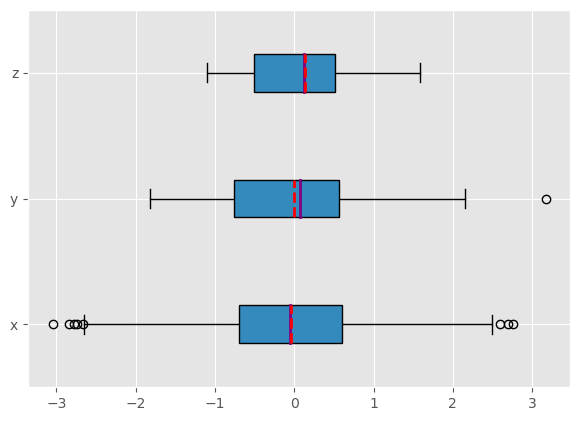

In [22]:
# boxplot:

plt.figure(figsize=(7, 5), dpi = 100)

plt.boxplot((x, y, z), vert=False, showmeans=True, meanline=True, labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})

plt.show()

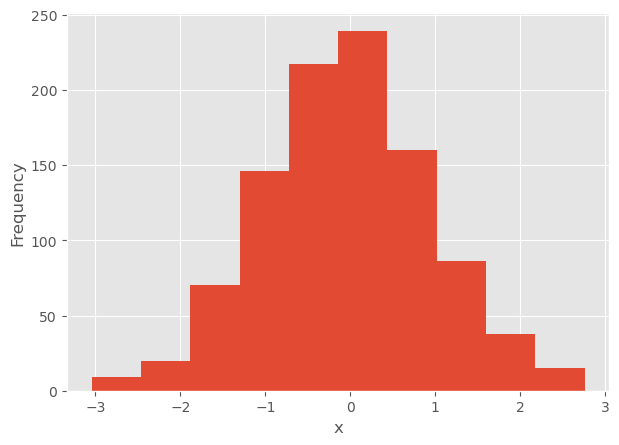

In [23]:
# histograma:

hist, bin_edges = np.histogram(x, bins=10)

plt.figure(figsize=(7, 5), dpi = 100)

plt.hist(x, bin_edges, cumulative=False)

plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

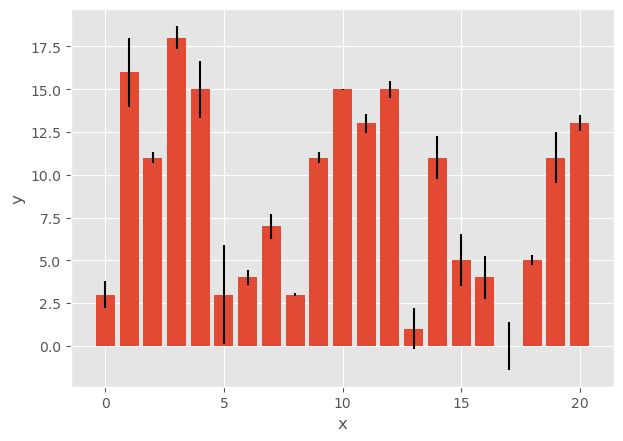

In [24]:
# barras:

x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

plt.figure(figsize=(7, 5), dpi = 100)

plt.bar(x, y, yerr=err)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

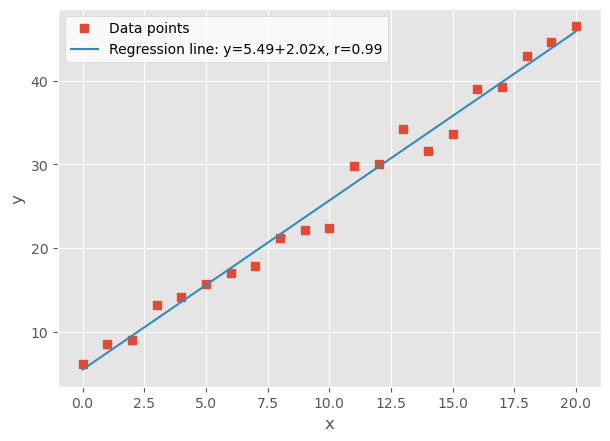

In [25]:
# dispersão:

x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)

slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

plt.figure(figsize=(7, 5), dpi = 100)

plt.plot(x, y, linewidth=0, marker='s', label='Data points')
plt.plot(x, intercept + slope * x, label=line)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(facecolor='white')
plt.show()

## Distribuições de probabilidade

**Uniforme:** Todo o intervalo tem a mesma probabilidade de ser observado, por tanto, dentro do intervalo a frequência será constante e fora dele será zero.

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

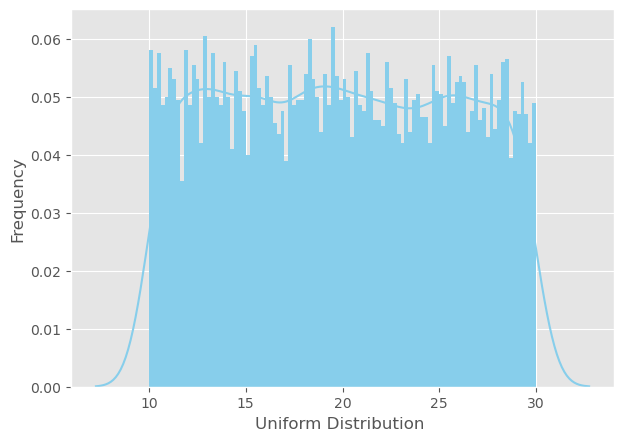

In [26]:
import seaborn as sns
from scipy.stats import uniform

n = 10000
start = 10
width = 20

data_uniform = uniform.rvs(size=n, loc = start, scale=width)

plt.figure(figsize=(7, 5), dpi = 100)

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

**Normal:** A distribuição normal possui formato de sino com média igual a 0 e desvio padrão definido. A distribuição é simétrica em relação a média.

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

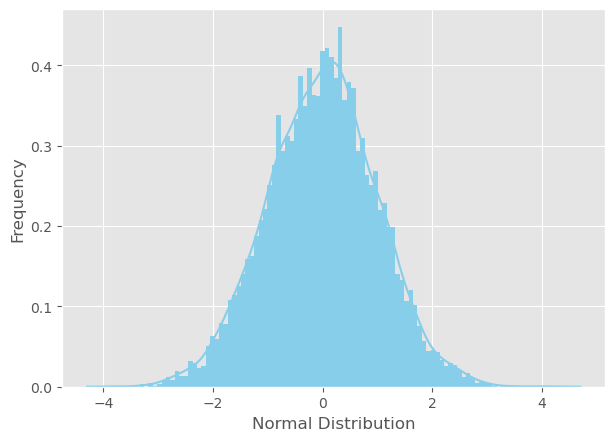

In [27]:
from scipy.stats import norm

data_normal = norm.rvs(size=10000,loc=0,scale=1)

plt.figure(figsize=(7, 5), dpi = 100)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

**Exponencial:** É uma distribuição em que os eventos ocorrem de forma contínua e independente a uma taxa constante.

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

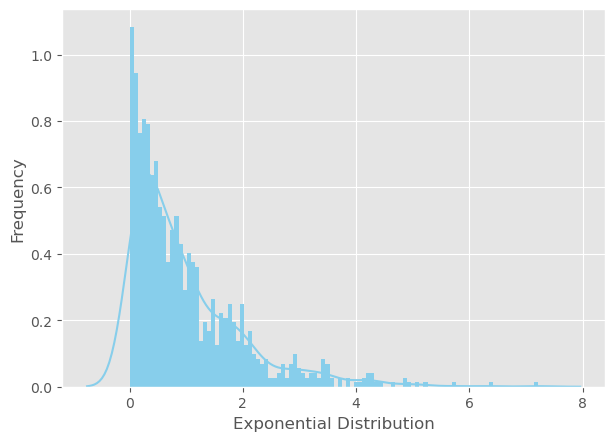

In [28]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

plt.figure(figsize=(7, 5), dpi = 100)

ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

**Poisson:** A distribuiçao de Poisson mostra a probabilidade de se observar k eventos em um intervalo, portanto, é uma distribuição de probabilidade discreta. Neste tipo de distribuição, a probabilidade de um evento acontecer é igual para todos os intervalos e o número de eventos em um intervalo independe do outro.

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

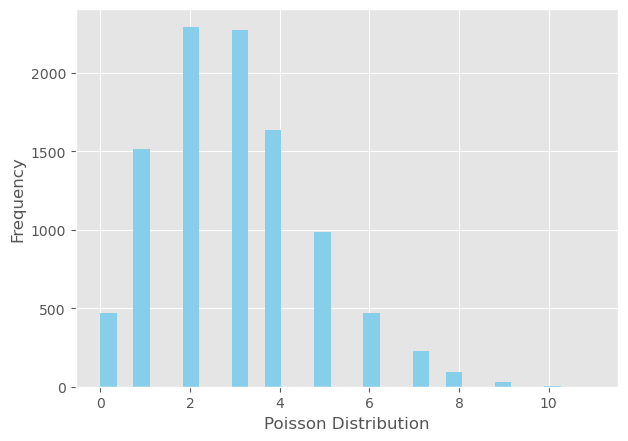

In [29]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

plt.figure(figsize=(7, 5), dpi = 100)

ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

**Binomial:** É uma distribuição onde apenas dois resultados são possíveis, sendo estes dois resultados independentes entre si e possuindo a mesma probabilidade de ocorrência.

[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

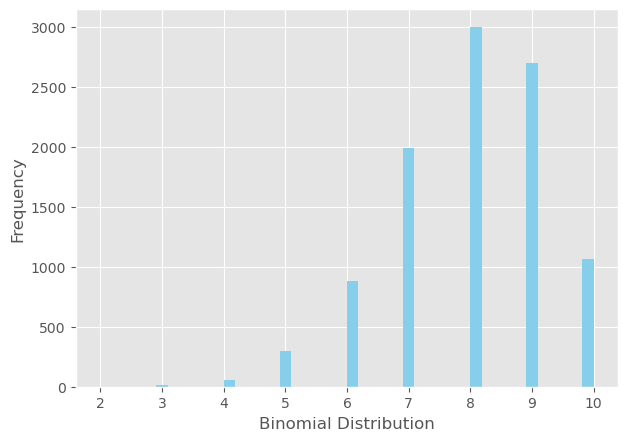

In [30]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

plt.figure(figsize=(7, 5), dpi = 100)

ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

**Bernoulli:** O resultado de um experimento de Bernoulli é sempre sucesso ou fracasso, então a distribuição obtém sempre valores 0 ou 1.

[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

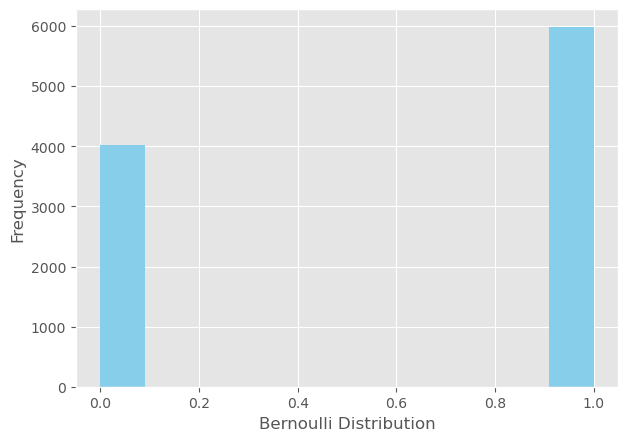

In [31]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)

plt.figure(figsize=(7, 5), dpi = 100)

ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

## Testes de Hipótese

O teste de hipóteses é um método que nos permite verificar se certos dados amostrais trazem evidências que confirmam ou refutam uma hipótese já formulada.

**Teorema central do limite:** conforme o tamanho de uma amostra aumenta, a distribuição amostral da sua média aproxima-se cada vez mais de uma distribuição normal, independentemente da distribuição da população.

**Exemplo:** O salário de um cientista de dados é 19.900? No caso, a hipótese já formulada afirma que o salário de um profissonal da ciência de dados é 19.900. Essa hipótese já formulada é o que no teste de hipótese chamamos de Hipótese Nula, H₀. Por sua vez, a hipótese que não confirma essa informação é chamada de Hipótese Alternativa, H₁. Então temos:
* **H₀:** o salário é igual a R$19.900

* **H₁:** o salário é diferente de R$19.900

**P-valor:** É a probabilidade de observarmos na população um valor no mínimo tão extremo quanto o obtido na amostra, considerando que a hipótese nula é verdadeira.

**Significância:** O nível de significância é uma medida de comparação do quão forte devem ser as evidências da sua amostra, para que a hipótese nula seja rejeitada.

**Tipos de erro:** O **erro tipo 1** acontece quando uma hipótese nula é rejeitada quando na realidade ela é verdadeira, e o **erro tipo 2** acontece quando a hipótese nula não é rejeitada quando na realidade ela é falsa.

**Tipo do teste:** A grosso modo, o teste **bicaudal** é o teste em que hipótese alternativa é ≠ e o teste **unicaudal** é quando é < ou >.

In [32]:
# link dos dados no dropbox do Marcelo Randolfo
link = 'https://www.dropbox.com/s/4p982epvk1ib8mz/datahackers-survey-2019-anonymous-responses.csv?dl=1'

# importando a base de dados
df = pd.read_csv(link)

# observando os cinco primeiros valores
df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')",...,"('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,...,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,...,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,...,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,...,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,...,0,Udemy,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN


In [33]:
# excluindo NA das variáveis alvo - salary_range
df.dropna(axis = 0, subset = ["('P16', 'salary_range')"], inplace = True)

# criando uma nova coluna com o valor médio do range de salários
df['salario'] = df["('P16', 'salary_range')"].map({'Menos de R$ 1.000/mês': 500,
                                                         'de R$ 1.001/mês a R$ 2.000/mês': 1500, 
                                                         'de R$ 2.001/mês a R$ 3000/mês': 2500,
                                                         'de R$ 3.001/mês a R$ 4.000/mês': 3500,
                                                         'de R$ 4.001/mês a R$ 6.000/mês': 5000,
                                                         'de R$ 6.001/mês a R$ 8.000/mês': 7000,
                                                         'de R$ 8.001/mês a R$ 12.000/mês': 10000,
                                                         'de R$ 12.001/mês a R$ 16.000/mês': 14000,
                                                         'de R$ 16.001/mês a R$ 20.000/mês': 18000,
                                                         'de R$ 20.001/mês a R$ 25.000/mês': 22500,
                                                         'Acima de R$ 25.001/mês': 30000})

# mantendo na amostra somente os profissionais que trabalham como cientistas de dados
df = df[df["('P19', 'is_data_science_professional')"] == 1]

# obtendo as estatísticas da variável alvo
df_describe = df['salario'].describe().round(2).reset_index()
df_describe.columns = ['Estatística','Valor']
df_describe

,Estatística,Valor
0,count,795.00
1,mean,6986.16
2,std,5062.87
3,min,500.00
4,25%,3500.00
5,50%,5000.00
6,75%,10000.00
7,max,30000.00


In [34]:
import scipy.stats as sct

stat, p = sct.ttest_1samp(df['salario'], popmean=19900)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))

Estatística de teste: -71.92
p-valor: 0.0


Pela definição do p-valor, a probabilidade de encontrar na população um valor no mínimo tão extremo quanto a média amostral, dado que a hipótese nula é verdadeidera, é igual a zero (não zero absoluto, é bem próximo de zero na verdade). Isso quer dizer que se a média salarial dos cientistas de dados fosse realmente 19.900, a chance de nós encontrarmos uma amostra de salários com média igual a 6.986,16 (média da base acima) é praticamente zero. Isso quer dizer que nossa amostra é tão incomum que ela não pode ser real em um cenário que o salário médio de um cientista de dados é 19.900. Ou seja, a amostra fornece evidências de que a hipótese nula não é verdadeira.

A "regra de bolso" para a análise da significância diz que:
* Se p-valor < α: a amostra possui evidências suficientes para rejeitar a hipótese nula.
* se p-valor > α: a amostra não possui evidências suficientes para rejeitar a hipótese nula.

Como o p-valor é 0, fica abaixo de qualquer nível de significância, então podemos rejeitar a hipótese nula.